## OpenCV를 활용한 이미지와 영상 처리

In [1]:
!mkdir ./data # 현재 디렉터리(content) 아래 data 디렉터리 생성
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘./data’: File exists
--2022-01-28 11:37:44--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.03s   

2022-01-28 11:37:45 (10.6 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]



#### OpenCV로 이미지 로드하기
- OpenCV의 imread()는 RGB를 BGR로 변환하므로 원하지 않는 이미지가 출력됨

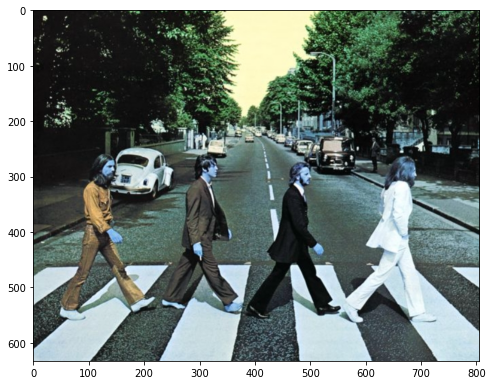

In [2]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('/content/data/beatles01.jpg')

plt.figure(figsize=(8, 8))
plt.imshow(img);

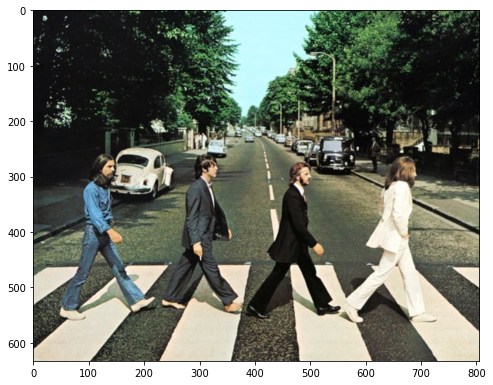

In [3]:
img = cv2.imread('/content/data/beatles01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR을 RGB로 변경 ---①

plt.figure(figsize=(8, 8))
plt.imshow(img);

#### OpenCV로 영상 처리
* OpenCV는 간편하게 비디오 영상처리를 할 수 있는 API를 제공
* VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
* VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [4]:
!mkdir ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

mkdir: cannot create directory ‘./data’: File exists
--2022-01-28 11:37:46--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-01-28 11:37:46--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-01-28 11:37:46--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuse

In [5]:
video_input_path = '/content/data/Night_Day_Chase.mp4' # 영상 파일 경로

cap = cv2.VideoCapture(video_input_path) # 비디오 캡쳐 객체 생성 ---①
video_wight = cap.get(cv2.CAP_PROP_FRAME_WIDTH) # 비디오 캡쳐 객체 프레임의 너비 ---②
video_height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 비디오 캡쳐 객체 프레임의 높이 ---③
video_size = (round(video_wight), round(video_height)) # 비디오 크기 (200, 400)
video_fps = cap.get(cv2.CAP_PROP_FPS ) # FPS(Frames Per Second) ---④
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # Frame 갯수

print('총 Frame 갯수:', frame_cnt, '/ FPS:', round(video_fps), '/ Frame 크기:', video_size)

총 Frame 갯수: 1383 / FPS: 28 / Frame 크기: (1216, 516)


In [6]:
import time

# 리눅스에서는 video output의 확장자를 반드시 avi로 설정해야 함
video_output_path = '/content/data/Night_Day_Chase_out.mp4' # 영상 output 파일 경로
codec = cv2.VideoWriter_fourcc(*'XVID') # Codec은 *'XVID'로 설정 ---①
# VideoWriter 객체 생성 ---②
video_writer = cv2.VideoWriter(video_output_path, codec, video_fps, video_size) 

green_color=(0, 255, 0)
red_color=(0, 0, 255)

start_time = time.time() # 시작 시간
index = 0 # 인덱스

while True:
    hasFrame, img_frame = cap.read() # 비디오 캡쳐 객체에서 Frame 하나 읽기 ---③
    if not hasFrame:
        break
    index += 1
    # 현재 프레임에 임의의 사각형 그리기 ---④
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    text = f'Frame {index}'
    cv2.putText(img_frame, text, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    video_writer.write(img_frame) # 사각형을 그린 프레임을 저장 ---⑤

end_time = time.time() # 완료 시간
print('Write 처리 시간:', round(end_time - start_time, 1))

video_writer.release() # video_writer 닫기
cap.release() # cap 닫기

Write 처리 시간: 20.7
